# Import Library

In [1]:
import os
import numpy as np
import tensorflow

from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


# Data PreProcessing

In [2]:
# import os
os.listdir('Dataset')

['Test', 'Train', 'Val']

In [77]:
IMAGE_SIZE=[128,128]    #Resize image to uniform one

train_path='Dataset/Train'
val_path='Dataset/Val'
train_path='Dataset/Test'

# DATA AUGMENTATION

In [78]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)  #no augmentaion in val and test dataset
test_datagen=ImageDataGenerator(rescale=1./255)

#Create dataset
training_set=train_datagen.flow_from_directory('Dataset/Train',target_size=(128,128),batch_size=32,class_mode='categorical')
val_set=train_datagen.flow_from_directory('Dataset/val',target_size=(128,128),batch_size=32,class_mode='categorical')
test_set=train_datagen.flow_from_directory('Dataset/Test',target_size=(128,128),batch_size=32,class_mode='categorical')

#80% 10% 10% distribute

# ------1-----

Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


# Model Building

In [80]:
base_model=VGG16(input_shape=(128,128,3),weights='imagenet',include_top=False)  #imagenet

In [81]:
for layer in base_model.layers: #do not train initial weights
    layer.trainable=False   #Freezing initial weights

In [82]:
inp=base_model.input

x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)

output=Dense(2,activation='softmax')(x) #2 neurons of classes(Covid or not)
model=Model(inputs=inp,outputs=output)

In [83]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [84]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [85]:
history=model.fit(
    training_set,
    batch_size=32,
    verbose=1,
    epochs=2,#5
    validation_data=(val_set)
)

#----2---

Epoch 1/2
114/114 [==============================] - 139s 1s/step - loss: 0.1508 - accuracy: 0.9585 - val_loss: 0.1076 - val_accuracy: 0.9648
Epoch 2/2
114/114 [==============================] - 134s 1s/step - loss: 0.0840 - accuracy: 0.9756 - val_loss: 0.0500 - val_accuracy: 0.9802


In [86]:
history.history

{'loss': [0.15079641342163086, 0.08396660536527634],
 'accuracy': [0.9585278630256653, 0.9755561947822571],
 'val_loss': [0.1076393723487854, 0.05001058802008629],
 'val_accuracy': [0.9648351669311523, 0.9802197813987732]}

In [87]:
print("Evaluate on Test Data")
results=model.evaluate(test_set,batch_size=32)
print("test loss , test acc:",results)

Evaluate on Test Data
15/15 [==============================] - 17s 1s/step - loss: 0.0290 - accuracy: 0.9868
test loss , test acc: [0.028972508385777473, 0.9868131875991821]


# Save Model

In [88]:
model.save('model.h5')

# Plotting

In [89]:
history.history

{'loss': [0.15079641342163086, 0.08396660536527634],
 'accuracy': [0.9585278630256653, 0.9755561947822571],
 'val_loss': [0.1076393723487854, 0.05001058802008629],
 'val_accuracy': [0.9648351669311523, 0.9802197813987732]}

In [90]:
def plot(history):
    fig,axes=plt.subplots(1,2,figsize=(10,4))

    #loss
    axes[0].plot(history["loss"],"r-",history["val_loss"],"b-",linewidth=0.5)
    axes[0].set_title("Loss curve")

    #accuracy
    axes[1].plot(history["accuracy"],"r-",history["val_accuracy"],"b-",linewidth=0.5)
    axes[1].set_title("accuracy curve")

    fig.tight_layout()
    fig.show()

C:\Users\agniv\AppData\Local\Temp\ipykernel_16788\4210999116.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


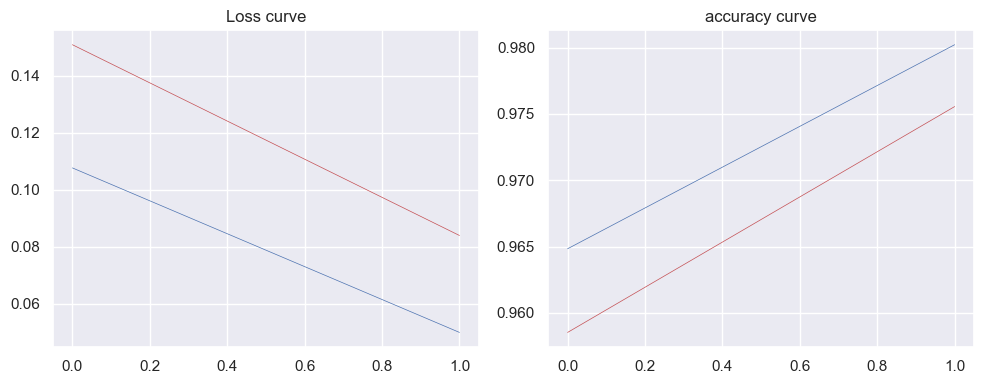

In [91]:
plot(history.history)

# Predictions

In [92]:
import cv2

In [93]:
img=cv2.imread('D:\AI(edu)\Test Images/CVD.jpg')

Text(0.5, 1.0, 'Testing image')

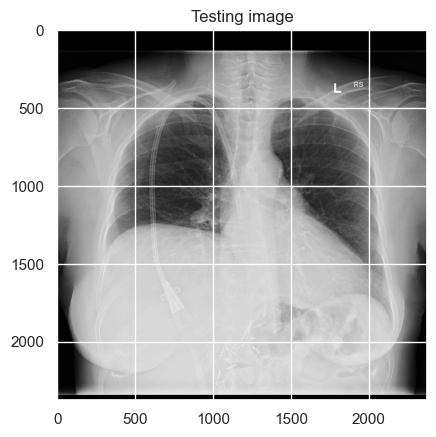

In [94]:
plt.imshow(img)
plt.title("Testing image")
# plt.show()

# Load Model

In [95]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [96]:
mymodel=load_model('model.h5')

In [97]:
mymodel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [98]:
from sklearn import preprocessing

#Reading a image 
img=image.load_img(r'D:\AI(edu)\Test Images/CVD.jpg',target_size=(128,128))

#img to array
x=image.img_to_array(img)

#expanding the dimension
x=np.expand_dims(x,axis=0)

img_data=preprocess_input(x)
# classes=mymodel.predict(img_data)

In [99]:
img_data

array([[[[-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         ...,
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ]],

        [[-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         ...,
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ]],

        [[-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         ...,
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ],
         [-103.939   , -116.779   , -123.68    ]],

        ...,

        [[ -63.939003,  -76.779   ,  -

In [100]:
test_set

In [102]:
classes=mymodel.predict(img_data)
result=int(classes[0][0])

1/1 [==============================] - 0s 80ms/step


In [103]:
result=int(classes[0][0])
if result==1:
    print("Person is affected by covid19")
else:
    print("Result is normal")

#----3----

Person is affected by covid19


# Confusion Matrix

In [104]:
test_set=train_datagen.flow_from_directory('Dataset/Test',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=False)

Found 455 images belonging to 2 classes.


In [105]:
#predicting on test_set
Y_pred=np.argmax(mymodel.predict_generator(test_set),axis=1)    #argmax round off the value

C:\Users\agniv\AppData\Local\Temp\ipykernel_16788\2398279587.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred=np.argmax(mymodel.predict_generator(test_set),axis=1)


In [106]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [107]:
Y_test=test_set.classes

In [108]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
cm=confusion_matrix(Y_test,Y_pred)  #Y_pred for what our model has predicted
print('Confusion matrix :\n',cm)

Confusion matrix :
 [[126   2]
 [  2 325]]


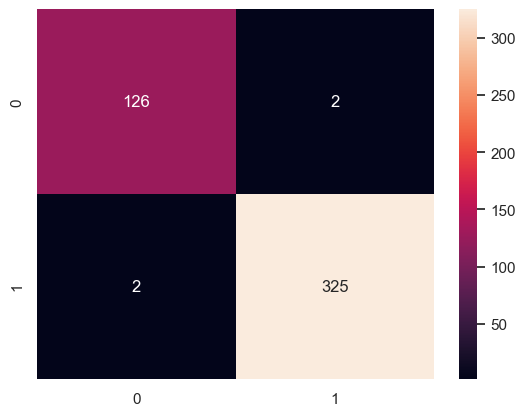

In [111]:
from __future__ import annotations

cm=sns.heatmap(cm,annot=True,fmt="d")

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(Y_test,Y_pred,target_names=['COVID-19','NORMAL']))

              precision    recall  f1-score   support

    COVID-19       0.98      0.98      0.98       128
      NORMAL       0.99      0.99      0.99       327

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



# ROC_AUC

In [129]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve,auc,roc_auc_score

ROC AUC score:  0.9891293960244648


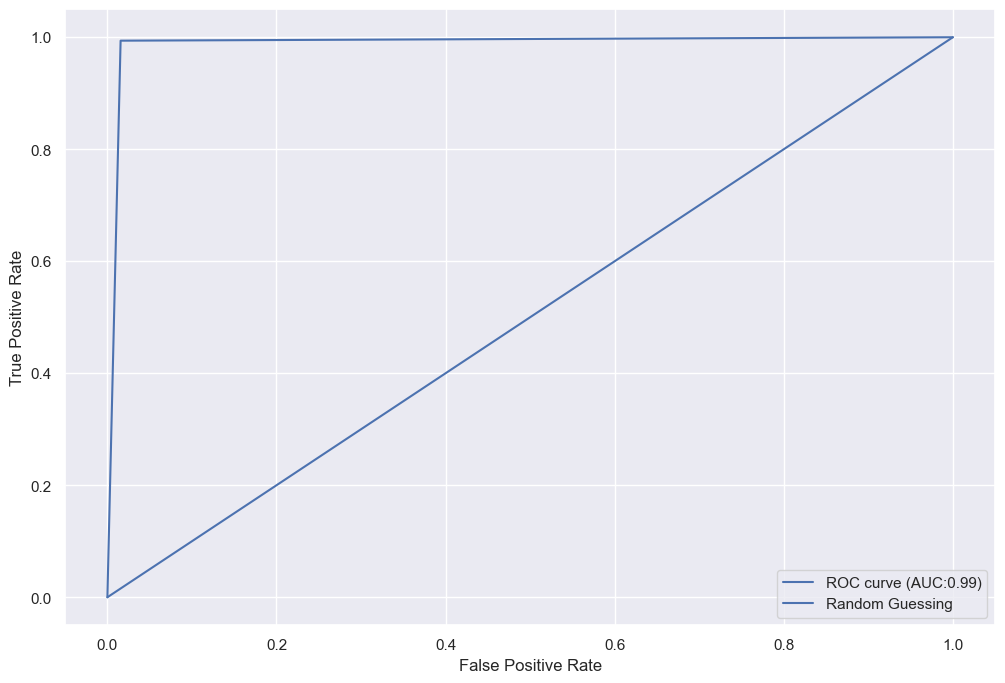

In [132]:
# from cv2 import threshold


target=['ROC curve']
fig,c_ax=plt.subplots(1,1,figsize=(12,8))

def roc(Y_test,Y_pred,average='macro'):
    lb=LabelBinarizer()
    lb.fit(Y_test)
    Y_test=lb.transform(Y_test)
    Y_pred=lb.transform(Y_pred)

    for(idx,c_label) in enumerate(target):
        fpr,tpr,threshold=roc_curve(Y_test[:,idx].astype(int),Y_pred[:,idx])
        c_ax.plot(fpr,tpr,label='%s (AUC:%0.2f)' % (c_label,auc(fpr,tpr)))
    
    c_ax.plot(fpr,fpr,'b-',label='Random Guessing')
    return roc_auc_score(Y_test,Y_pred,average=average)

print('ROC AUC score: ',roc(Y_test,Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
    